In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns              # Visualizacion
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [120]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [121]:
df = pd.read_pickle("/content/drive/MyDrive/Bmw_data_preproceamiento/Clases_limpieza/Clase 1 - Limpieza datos PREPRO_ML.pkl")

In [122]:
pd.options.display.float_format = '{:.0f}'.format

In [123]:
df.head()

,km,potencia,fecha_registro,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,...,tipo_coche_van,modelo_agrupado_M1,modelo_agrupado_M2,modelo_agrupado_M3,modelo_agrupado_M4,modelo_agrupado_M5,modelo_agrupado_M6,modelo_agrupado_M7,modelo_agrupado_Otros,modelo_agrupado_X_SERIES
0,140411,100,2012-02-01,True,True,False,False,True,True,True,...,0,1,0,0,0,0,0,0,0,0
1,13929,317,2016-04-01,True,True,False,False,False,True,True,...,0,0,0,0,0,0,0,0,1,0
2,183297,120,2012-04-01,False,False,False,False,True,False,True,...,0,0,0,1,0,0,0,0,0,0
3,128035,135,2014-07-01,True,True,False,False,True,True,True,...,0,0,0,0,1,0,0,0,0,0
4,97097,160,2014-12-01,True,True,False,False,False,True,True,...,0,0,0,0,1,0,0,0,0,0


# porque este modelo es sencillo es para marcar las funcionalidades de cada paso ahora estamos listo para pasarle el data frame ya limpio codificado al modelo pero haremos unos cambios los siguientes para que vayan viendo del porque el modelo cuando es boleanna lo entiende perfectamente asi que no hay necesidad de codificar las boleanas pero si que borraremos las columnas de frecha de registro y de venta ya que hems extraido la informacion en la columna el tiempo en meses que se tardo vender el coche

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4802 entries, 0 to 4802
Data columns (total 46 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   km                           4802 non-null   float64       
 1   potencia                     4802 non-null   float64       
 2   fecha_registro               4802 non-null   datetime64[ns]
 3   volante_regulable            4802 non-null   bool          
 4   aire_acondicionado           4802 non-null   bool          
 5   camara_trasera               4802 non-null   bool          
 6   asientos_traseros_plegables  4802 non-null   bool          
 7   elevalunas_electrico         4802 non-null   bool          
 8   bluetooth                    4802 non-null   bool          
 9   gps                          4802 non-null   bool          
 10  alerta_lim_velocidad         4802 non-null   bool          
 11  precio                       4802 non-null 

In [125]:
df.drop(['fecha_registro', 'fecha_venta'], axis=1, inplace=True)


In [126]:
from sklearn.model_selection import train_test_split


# Dividir los datos en características (X) y objetivo (y)
X = df.drop(columns=['LOG_PRECIO'])
y = df['LOG_PRECIO']

# Dividir el conjunto de datos en entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Imprimir los tamaños de los conjuntos de entrenamiento y prueba
print("Tamaño de conjunto de entrenamiento (X_train, y_train):", X_train.shape, y_train.shape)
print("Tamaño de conjunto de prueba (X_test, y_test):", X_test.shape, y_test.shape)


Tamaño de conjunto de entrenamiento (X_train, y_train): (3841, 43) (3841,)
Tamaño de conjunto de prueba (X_test, y_test): (961, 43) (961,)


In [127]:
from sklearn.preprocessing import StandardScaler

In [128]:
scaler = StandardScaler()

In [129]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [130]:
regression_model = LinearRegression()
regression_model.fit(X_train_scaled, y_train)

LinearRegression()

In [131]:
# Realizar predicciones en el conjunto de entrenamiento y prueba
y_train_pred = regression_model.predict(X_train_scaled)
y_test_pred = regression_model.predict(X_test_scaled)


In [132]:
# Métricas para el conjunto de entrenamiento
mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_train_pred)

In [133]:
# Métricas para el conjunto de prueba
mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_test_pred)

In [134]:
# Imprimir las métricas para el conjunto de entrenamiento
print('TRAIN')
print('MAE:', round(mae_train, 4))
print('MSE:', round(mse_train, 4))
print('RMSE:', round(rmse_train, 4))
print('R2-score:', round(r2_train, 4))

TRAIN
MAE: 0.0628
MSE: 0.0183
RMSE: 0.1354
R2-score: 0.7696


In [135]:

print()

# Imprimir las métricas para el conjunto de prueba
print('TEST')
print('MAE:', round(mae_test, 4))
print('MSE:', round(mse_test, 4))
print('RMSE:', round(rmse_test, 4))
print('R2-score:', round(r2_test, 4))


TEST
MAE: 0.0628
MSE: 0.0136
RMSE: 0.1167
R2-score: 0.8095


In [136]:
    # Visualizacion
              # Visualizacion

<ipython-input-137-26a65d73e6f8>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(error)


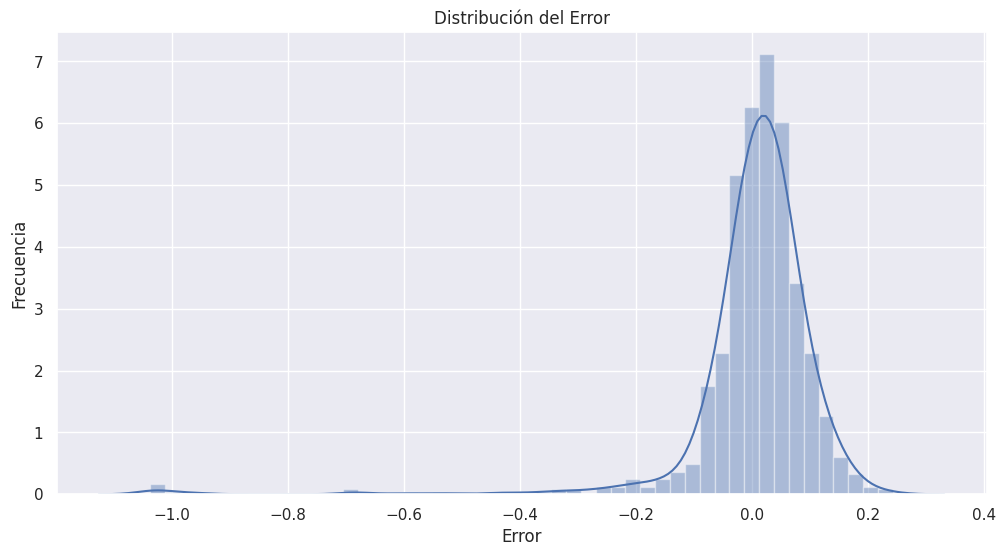

In [137]:
sns.set(rc={'figure.figsize':(12,6)})
sns.distplot(error)
plt.title('Distribución del Error')
plt.xlabel('Error')
plt.ylabel('Frecuencia')
plt.show()


In [138]:
confidence = 95
z = (100 - confidence) / 2
print("Intervalo del error (confianza", confidence, "%):", round(np.percentile(error, 100 - z), 4), "/", round(np.percentile(error, z), 4))


Intervalo del error (confianza 95 %): 0.1461 / -0.2142


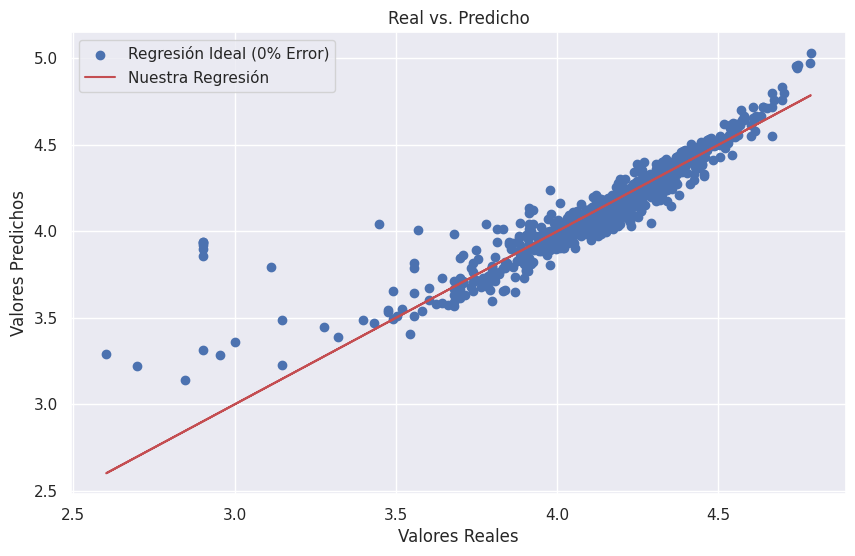

In [139]:
plt.figure(figsize=[10,6])
plt.scatter(y_test, y_test_pred)
plt.plot(y_test, y_test, 'r')
plt.title('Real vs. Predicho')
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.legend(['Regresión Ideal (0% Error)', 'Nuestra Regresión'])
plt.show()


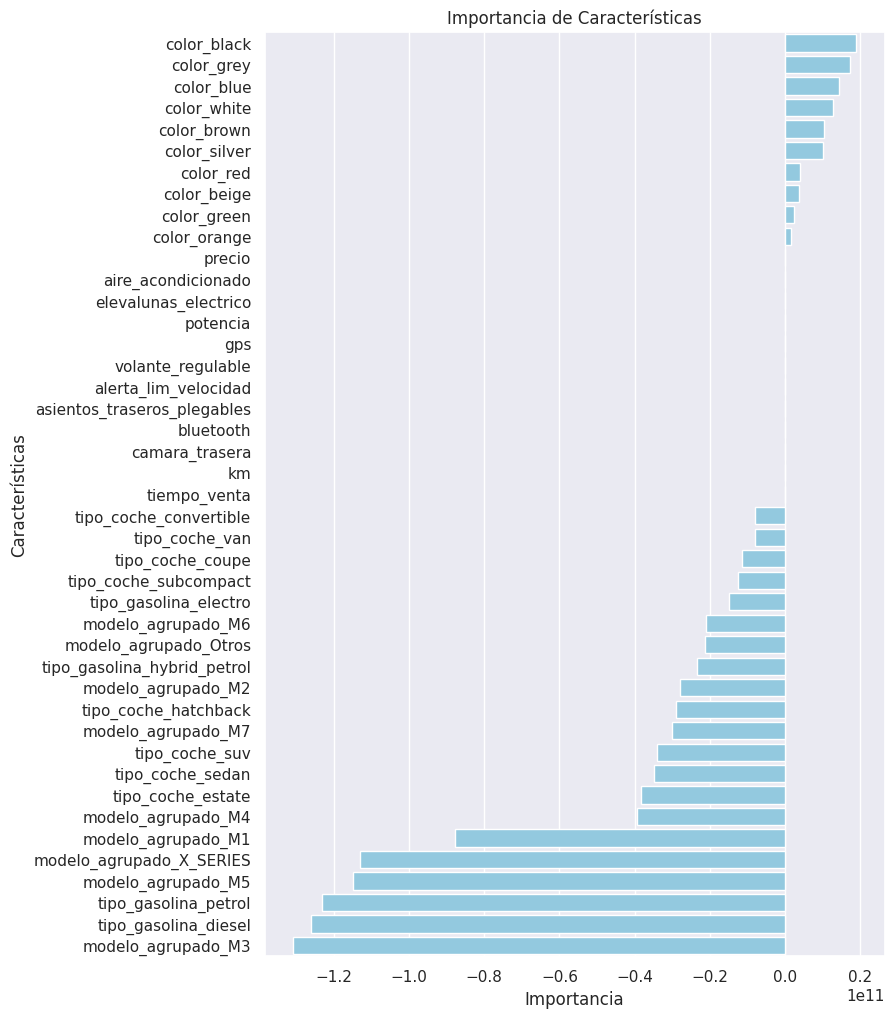

In [140]:
plt.figure(figsize=[8, 12])
sns.barplot(data=top_features, y='feature', x='importance', color='skyblue')
plt.title('Importancia de Características')
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.show()


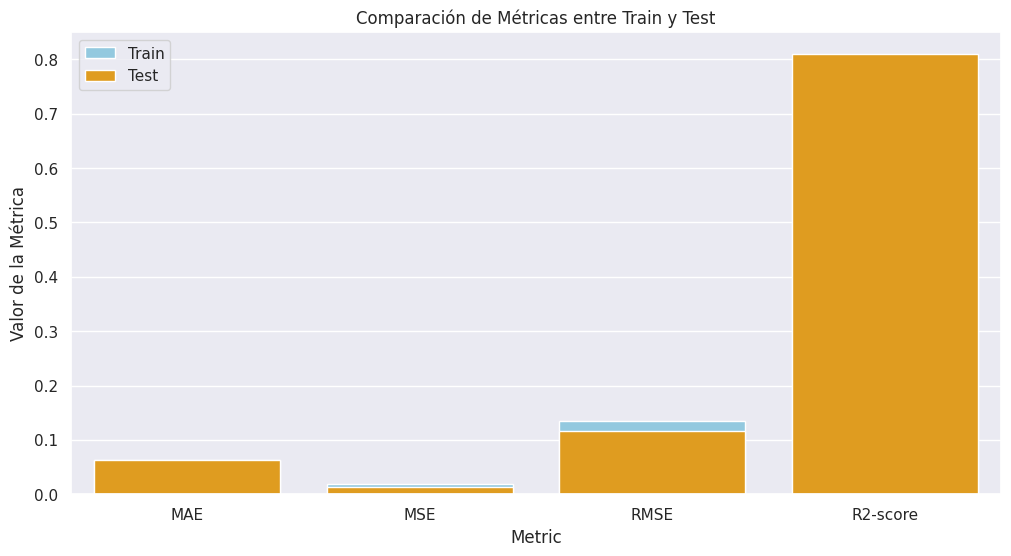

In [141]:
metrics_df = pd.DataFrame({
    'Metric': ['MAE', 'MSE', 'RMSE', 'R2-score'],
    'Train': [mae_train, mse_train, rmse_train, r2_train],
    'Test': [mae_test, mse_test, rmse_test, r2_test]
})

sns.barplot(data=metrics_df, x='Metric', y='Train', color='skyblue', label='Train')
sns.barplot(data=metrics_df, x='Metric', y='Test', color='orange', label='Test')
plt.title('Comparación de Métricas entre Train y Test')
plt.ylabel('Valor de la Métrica')
plt.legend()
plt.show()
